In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Pre_data = pd.read_csv("C:\\Users\\2019A00303\\Desktop\\Code\\Airbnb Project\\Data\\PreProcessingNetherlands.csv")
Pre_data

,Unnamed: 0,Host Since,Country,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,...,Entire home/apt,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,Day,Month
0,7900,2011-09-22,Netherlands,52.359927,4.862860,1.0,1.0,1.0,1.0,50.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3,9
1,7901,2015-10-31,Netherlands,52.361371,4.873860,2.0,1.0,1.0,1.0,95.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5,10
2,7903,2014-07-04,Netherlands,52.364646,4.874049,4.0,1.0,2.0,3.0,175.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4,7
3,7904,2011-11-27,Netherlands,52.358295,4.859092,2.0,1.0,1.0,1.0,100.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6,11
4,7905,2015-06-26,Netherlands,52.366679,4.865595,2.0,1.0,1.0,1.0,100.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12992,493976,2012-11-17,Netherlands,52.366330,4.903168,4.0,2.0,2.0,2.0,200.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5,11
12993,493977,2011-12-02,Netherlands,52.361913,4.902246,2.0,1.5,1.0,1.0,159.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4,12
12994,493979,2015-04-22,Netherlands,52.362278,4.907953,2.0,1.0,1.0,1.0,90.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,4
12995,493981,2013-04-29,Netherlands,52.367003,4.925560,2.0,1.0,1.0,1.0,55.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,4


<AxesSubplot:ylabel='Frequency'>

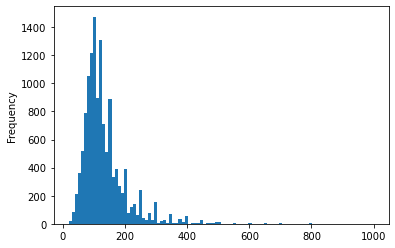

In [2]:
Pre_data['Price'].plot(kind='hist', bins=100)

In [3]:
Pre_data['group'] = pd.cut(x=Pre_data['Price'],
bins=[0, 50, 100, 150, 200, 1000],
labels=['group_1','group_2','group_3','group_4','group_5'])
Pre_data.head()

,Unnamed: 0,Host Since,Country,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,...,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,Day,Month,group
0,7900,2011-09-22,Netherlands,52.359927,4.862860,1.0,1.0,1.0,1.0,50.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3,9,group_1
1,7901,2015-10-31,Netherlands,52.361371,4.873860,2.0,1.0,1.0,1.0,95.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5,10,group_2
2,7903,2014-07-04,Netherlands,52.364646,4.874049,4.0,1.0,2.0,3.0,175.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4,7,group_4
3,7904,2011-11-27,Netherlands,52.358295,4.859092,2.0,1.0,1.0,1.0,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6,11,group_2
4,7905,2015-06-26,Netherlands,52.366679,4.865595,2.0,1.0,1.0,1.0,100.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4,6,group_2


In [4]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(Pre_data, Pre_data["group"]):
    train = Pre_data.loc[train_index]
    test = Pre_data.loc[test_index]

In [5]:
train['group'].value_counts() / len(train)

group_2    0.383668
group_3    0.345388
group_4    0.127922
group_5    0.104838
group_1    0.038184
Name: group, dtype: float64

In [6]:
test['group'].value_counts() / len(test)

group_2    0.383846
group_3    0.345385
group_4    0.127692
group_5    0.105000
group_1    0.038077
Name: group, dtype: float64

In [7]:
train.drop('group', axis=1, inplace=True)
train.head()

,Unnamed: 0,Host Since,Country,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,...,Entire home/apt,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,Day,Month
10693,414248,2014-10-03,Netherlands,52.376057,4.843227,2.0,1.0,1.0,1.0,79.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4,10
1411,57008,2011-04-18,Netherlands,52.410497,4.901557,4.0,1.0,2.0,4.0,93.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,4
11336,469021,2011-11-08,Netherlands,52.355068,4.938986,5.0,1.0,3.0,4.0,250.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,11
12312,490604,2014-05-24,Netherlands,52.368890,4.852662,2.0,0.5,1.0,1.0,90.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5,5
5544,251815,2014-09-25,Netherlands,52.350781,4.913177,3.0,1.0,2.0,2.0,199.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3,9


In [8]:
test.drop(['Unnamed: 0','group', 'Host Since', 'Country', 'Airbed', 'Couch', 'Futon', 'Pull-out Sofa', 'Real Bed', 'Cleaning Fee'], axis=1, inplace=True)
test.head()

,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews,Entire home/apt,Private room,Shared room,Day,Month
3528,52.363868,4.880814,17.0,5.0,5.0,16.0,299.0,12.0,15.0,2.0,1125.0,36.0,1.0,0.0,0.0,4,4
7430,52.383597,4.853304,4.0,1.0,1.0,2.0,151.0,2.0,25.0,10.0,1125.0,4.0,1.0,0.0,0.0,6,6
10422,52.362607,4.826644,2.0,1.0,1.0,1.0,70.0,2.0,30.0,2.0,1125.0,65.0,0.0,1.0,0.0,6,2
12644,52.371810,4.918040,3.0,1.0,1.0,1.0,100.0,2.0,25.0,2.0,1125.0,12.0,1.0,0.0,0.0,0,2
7733,52.361439,4.865976,2.0,1.0,1.0,1.0,79.0,1.0,0.0,2.0,1125.0,11.0,1.0,0.0,0.0,3,8


In [9]:
train_y = train[['Price']]
train_y.head()

,Price
10693,79.0
1411,93.0
11336,250.0
12312,90.0
5544,199.0


In [10]:
train.drop(['Unnamed: 0', 'Price', 'Host Since', 'Country','Airbed', 'Couch', 'Futon', 'Pull-out Sofa', 'Real Bed', 'Cleaning Fee'], axis=1, inplace=True)
train_X = train
train_X.head()

,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews,Entire home/apt,Private room,Shared room,Day,Month
10693,52.376057,4.843227,2.0,1.0,1.0,1.0,1.0,0.0,2.0,6.0,46.0,1.0,0.0,0.0,4,10
1411,52.410497,4.901557,4.0,1.0,2.0,4.0,2.0,25.0,3.0,1125.0,39.0,0.0,1.0,0.0,0,4
11336,52.355068,4.938986,5.0,1.0,3.0,4.0,4.0,20.0,5.0,1125.0,2.0,1.0,0.0,0.0,1,11
12312,52.368890,4.852662,2.0,0.5,1.0,1.0,1.0,0.0,2.0,1125.0,3.0,0.0,1.0,0.0,5,5
5544,52.350781,4.913177,3.0,1.0,2.0,2.0,2.0,50.0,2.0,1125.0,7.0,1.0,0.0,0.0,3,9


In [11]:
test_y= test[['Price']]
test_y.head()

,Price
3528,299.0
7430,151.0
10422,70.0
12644,100.0
7733,79.0


In [12]:
test.drop('Price', axis=1, inplace=True)
test_X = test
test_X.head()

,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews,Entire home/apt,Private room,Shared room,Day,Month
3528,52.363868,4.880814,17.0,5.0,5.0,16.0,12.0,15.0,2.0,1125.0,36.0,1.0,0.0,0.0,4,4
7430,52.383597,4.853304,4.0,1.0,1.0,2.0,2.0,25.0,10.0,1125.0,4.0,1.0,0.0,0.0,6,6
10422,52.362607,4.826644,2.0,1.0,1.0,1.0,2.0,30.0,2.0,1125.0,65.0,0.0,1.0,0.0,6,2
12644,52.371810,4.918040,3.0,1.0,1.0,1.0,2.0,25.0,2.0,1125.0,12.0,1.0,0.0,0.0,0,2
7733,52.361439,4.865976,2.0,1.0,1.0,1.0,1.0,0.0,2.0,1125.0,11.0,1.0,0.0,0.0,3,8


In [13]:
# from sklearn.linear_model import LinearRegression

# l_reg = LinearRegression()
# l_reg.fit(train_X, train_y)

In [14]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np

# predictions = l_reg.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [15]:
# predictions = l_reg.predict(test_X)
# mse = mean_squared_error(test_y, predictions)
# mae = mean_absolute_error(test_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [16]:
# from sklearn.tree import DecisionTreeRegressor

# d_reg = DecisionTreeRegressor()
# d_reg.fit(train_X, train_y)

In [17]:
# predictions = d_reg.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [18]:
# predictions = d_reg.predict(test_X)
# mse = mean_squared_error(test_y, predictions)
# mae = mean_absolute_error(test_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [19]:
# from sklearn.svm import SVR

# svr = SVR()
# svr.fit(train_X, train_y)

In [20]:
# predictions = svr.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [21]:
# predictions = svr.predict(test_X)
# mse = mean_squared_error(test_y, predictions)
# mae = mean_absolute_error(test_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [22]:
# from sklearn.neighbors import KNeighborsRegressor
# knn = KNeighborsRegressor()
# knn.fit(train_X, train_y)

In [23]:
# predictions = knn.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [24]:
# predictions = knn.predict(test_X)
# mse = mean_squared_error(test_y, predictions)
# mae = mean_absolute_error(test_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [25]:
# from sklearn.neural_network import MLPRegressor

# ann = MLPRegressor()
# ann.fit(train_X, train_y)

In [26]:
# predictions = ann.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [27]:
# predictions = ann.predict(test_X)
# mse = mean_squared_error(test_y, predictions)
# mae = mean_absolute_error(test_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [28]:
from sklearn.ensemble import RandomForestRegressor

r_reg = RandomForestRegressor()
r_reg.fit(train_X, train_y)

C:\Users\2019A0~1\AppData\Local\Temp/ipykernel_20636/806139679.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  r_reg.fit(train_X, train_y)


RandomForestRegressor()

Text(0.5, 0, 'Relative Importance')

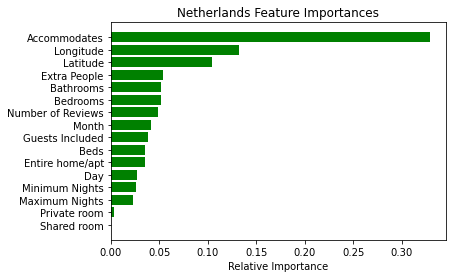

In [29]:
features = train_X.columns
importances = r_reg.feature_importances_
indices = np.argsort(importances)

plt.title('Netherlands Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

In [30]:
predictions = r_reg.predict(train_X)
mse = mean_squared_error(train_y, predictions)
mae = mean_absolute_error(train_y, predictions)
rmse = np.sqrt(mse)
print(mse, rmse, mae)

334.1382685390016 18.279449349994152 11.495700682889295


In [31]:
# from sklearn.model_selection import GridSearchCV

# param = {'n_estimators' : [800,900,1000], 'max_features' : ['sqrt','auto','log2'], 'max_depth' : [8,9,10],
#          'min_samples_split': [2,3,4]}

# r_reg = RandomForestRegressor(random_state=42)

# search = GridSearchCV(r_reg, param, cv=5,
#                       scoring='neg_mean_absolute_error')
                      
# search.fit(train_X, train_y['Price'].ravel())

In [32]:
# from sklearn.ensemble import RandomForestRegressor

# r_reg = RandomForestRegressor(bootstrap=True,
#                               min_samples_split=2,
#                               criterion='mse',
#                               max_depth=None,
#                               max_features='auto',
#                               n_estimators=1000,
#                               random_state=42,
#                               )
# r_reg.fit(train_X, train_y['Price'].ravel())

In [33]:
# predictions = r_reg.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)